Beata Sirowy

# Bayesian statistics in practice: estimating counts

Based on: Downey, A. (2021) _Think Bayes_

We’ll work on problems related to counting, or estimating the
size of a population.

## The Train Problem
Source:  Frederick Mosteller’s _Fifty Challenging Problems
in Probability with Solutions:_

A railroad numbers its locomotives in order 1..N. One day you see a
locomotive with the number 60. Estimate how many locomotives the railroad
has.

Based on this observation, we know the railroad has 60 or more locomotives.
But how many more? 

To apply Bayesian reasoning, we can break this problem
into two steps:

- What did we know about N before we saw the data?
- For any given value of N, what is the likelihood of seeing the data (a
locomotive with number 60)?

The answer to the first question is the prior. The answer to the second is the
likelihood.

- Let’s assume that N is equally likely to be any
value from 1 to 1000.

Here’s the prior distribution:

In [6]:
import pandas as pd
import numpy as np
from empiricaldist import Pmf

hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)


prior

,probs
1,1
2,1
3,1
4,1
5,1
...,...
996,1
997,1
998,1
999,1


Now let’s figure out the likelihood of the data. 
- In a hypothetical fleet of N
locomotives, what is the probability that we would see number 60? If we assume
that we are equally likely to see any locomotive, the chance of seeing any
particular one is 1/N

In [2]:
def update_train(pmf, data): # Update pmf based on new data.
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [3]:
data = 60
posterior = prior.copy()
update_train(posterior, data)

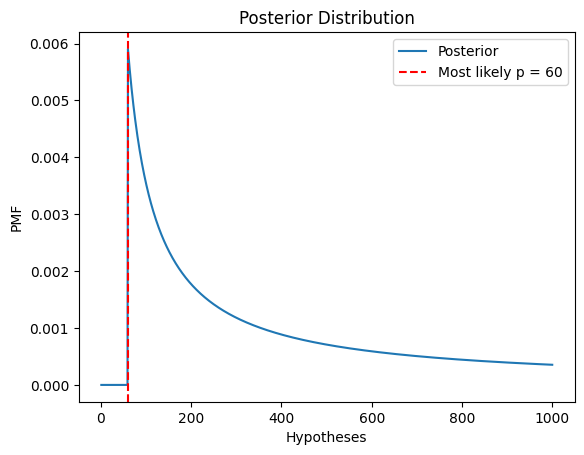

In [10]:
import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.max_prob(), color='r', linestyle='--', 
label=f'Most likely p = {posterior.max_prob()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution') 
plt.legend() 

plt.show()

Not surprisingly, all values of N below 60 have been eliminated.

That might not seem like a very good guess; after all, what are the chances that
you just happened to see the train with the highest number? Nevertheless, __if you
want to maximize the chance of getting the answer exactly right, you should
guess 60__.
But maybe that’s not the right goal. 

An alternative is to compute the mean of the
posterior distribution.

Given a set of possible quantities Qi, , and their
probabilities, Pi, the mean of the distribution is:

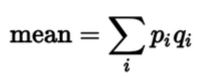

In [11]:
np.sum(posterior.ps * posterior.qs)

np.float64(333.41989326370776)

Alternatively: 

In [12]:
posterior.mean()

np.float64(333.41989326370776)

__The mean of the posterior is 333, so that might be a good guess if you want to
minimize error__. If you played this guessing game over and over, using the mean
of the posterior as your estimate would minimize the mean squared error over
the long run.

### Sensitivity to the Prior
The prior I used in the previous section is uniform from 1 to 1000, but I offered
no justification for choosing a uniform distribution or that particular upper
bound. We might wonder whether the posterior distribution is sensitive to the
prior. With so little data—only one observation—it is.

- Let's try with the upper bands 200, 1000, 2000 


__Upper band 200__

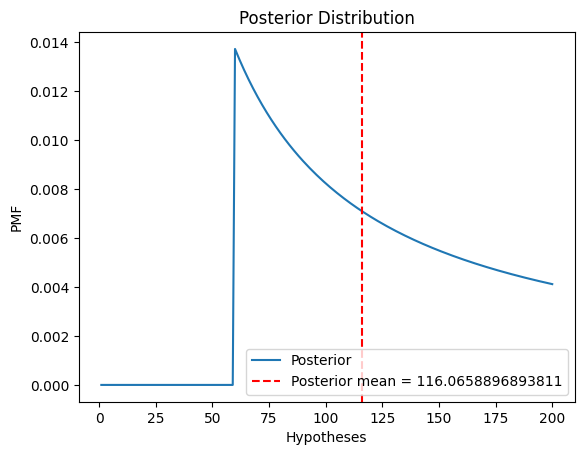

In [34]:
prior = Pmf(1, hypos)
hypos = np.arange(1, 201)
def update_train(pmf, data): # Update pmf based on new data.
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()
    
data = 60
posterior = prior.copy()
update_train(posterior, data)

import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution') 
plt.legend() 

plt.show()

__Upper band 1000__

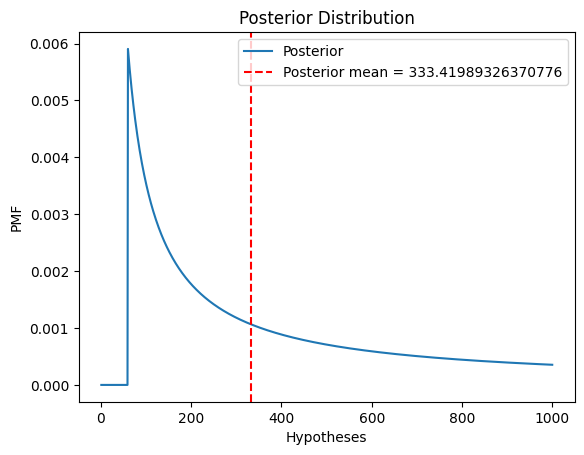

In [21]:
prior = Pmf(1, hypos)
hypos = np.arange(1, 1001)
def update_train(pmf, data): # Update pmf based on new data.
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()
    
data = 60
posterior = prior.copy()
update_train(posterior, data)

import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution') 
plt.legend() 

plt.show()

__Upper band 2000__

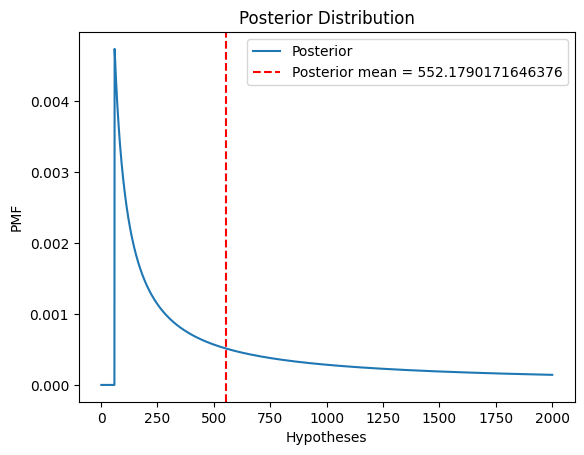

In [23]:
prior = Pmf(1, hypos)
hypos = np.arange(1, 2001)
def update_train(pmf, data): # Update pmf based on new data.
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()
    
data = 60
posterior = prior.copy()
update_train(posterior, data)

import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution') 
plt.legend() 

plt.show()

As we vary the upper bound, the posterior mean changes substantially. So that’s
bad.
When the posterior is sensitive to the prior, there are two ways to proceed:

- Get more data.
- Get more background information and choose a better prior.

With more data, posterior distributions based on different priors tend to
converge.
For example, suppose that in addition to train 60 we also see trains 30 and 90.
Here’s how the posterior means depend on the upper bound of the prior, when
we observe three trains:

__Upper band 200__

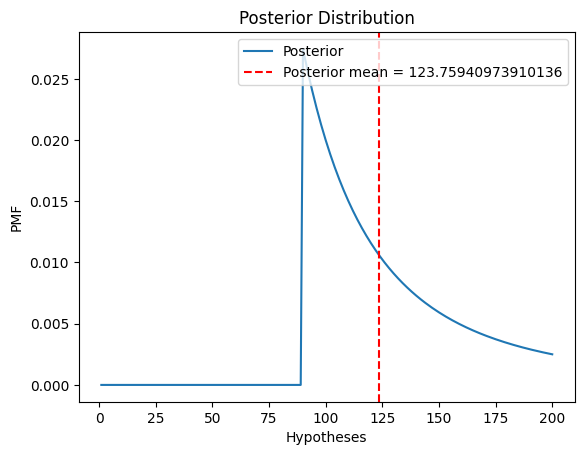

In [2]:
import numpy as np 
from empiricaldist import Pmf 
import matplotlib.pyplot as plt

hypos = np.arange(1, 201)
prior = Pmf(1, hypos)

def update_train_list(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [60, 30, 90]
posterior = prior.copy()
update_train_list(posterior, data)


import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution') 
plt.legend() 

plt.show()

__Upper band 1000__

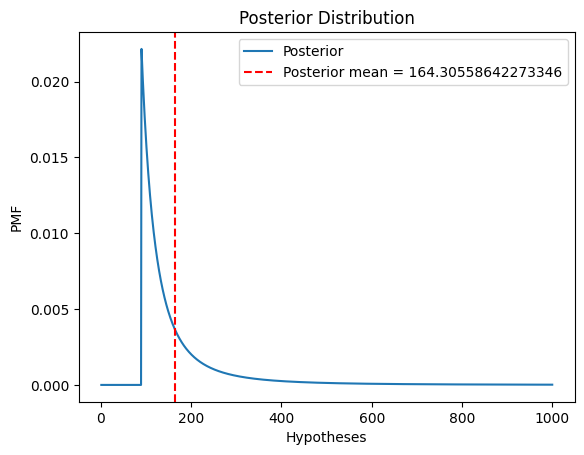

In [6]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)


def update_train(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [60, 30, 90]
posterior = prior.copy()
update_train(posterior, data)

import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution') 
plt.legend() 

plt.show()

__Upper band 2000__

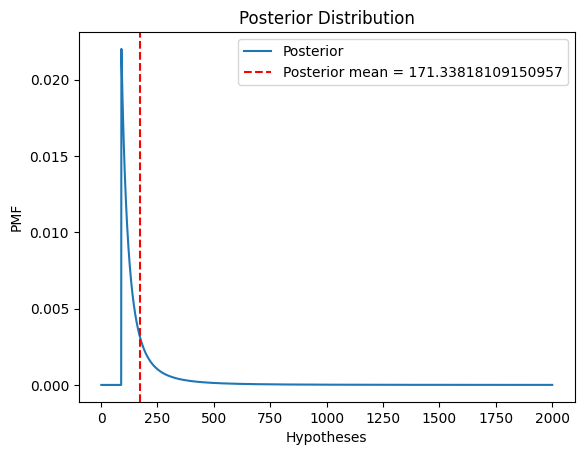

In [5]:
hypos = np.arange(1, 2001)
prior = Pmf(1, hypos)


def update_train(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [60, 30, 90]
posterior = prior.copy()
update_train(posterior, data)

import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution') 
plt.legend() 

plt.show()

The differences are smaller, but apparently three trains are not enough for the
posteriors to converge.

### Power Law Prior

__The power law gives less prior probability to high values__

If more data are not available, another option is to improve the priors by
gathering more background information. 
- It is probably not reasonable to assume
that a train-operating company with 1,000 locomotives is just as likely as a
company with only 1.
- With some effort, we could probably find a list of companies that operate
locomotives in the area of observation. Or we could interview an expert in rail
shipping to gather information about the typical size of companies.
- But even without getting into the specifics of railroad economics, we can make
some educated guesses. 
- In most fields, there are many small companies, fewer
medium-sized companies, and only one or two very large companies.

In fact, __the distribution of company sizes tends to follow a power law__, as Robert
Axtell reports in _Science_.




This law suggests that:
-  if there are 1,000 companies with fewer than 10
locomotives, 
- there might be 100 companies with 100 locomotives, 
- 10 companies
with 1,000, 
- and possibly one company with 10,000 locomotives.

Mathematically, __a power law means that the number of companies with a given
size N, is proportional to__ 
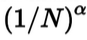

where alpha is a parameter that is often near 1.

We can construct a power law prior like this:

In [ ]:
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()

power

,probs
1,0.133592
2,0.066796
3,0.044531
4,0.033398
5,0.026718
...,...
996,0.000134
997,0.000134
998,0.000134
999,0.000134


__Upper band 200__

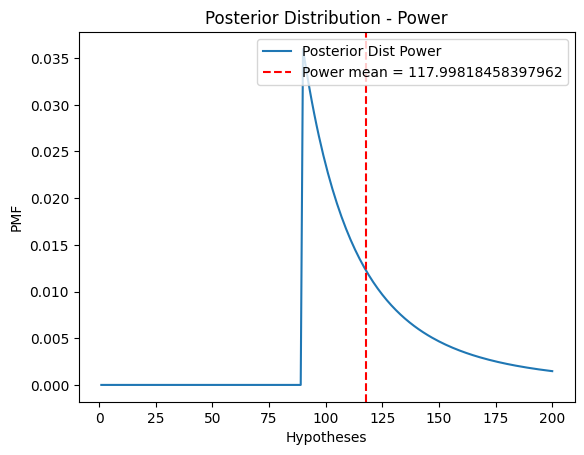

In [22]:
hypos = np.arange(1, 201)
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()


def update_train(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [60, 30, 90]
posterior = power.copy()
update_train(power, data)

import matplotlib.pyplot as plt

plt.plot(hypos, power, label='Posterior Dist Power') 
plt.axvline(power.mean(), color='r', linestyle='--', 
label=f'Power mean = {power.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution - Power') 
plt.legend() 

plt.show()

__Upper band 1000__

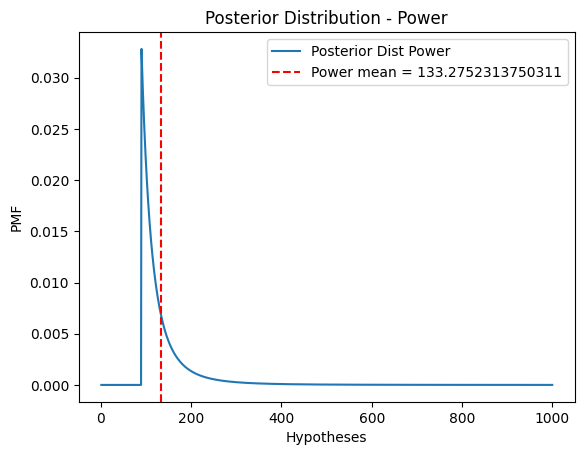

In [24]:
hypos = np.arange(1, 1001)
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()


def update_train(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [60, 30, 90]
posterior = power.copy()
update_train(power, data)

import matplotlib.pyplot as plt

plt.plot(hypos, power, label='Posterior Dist Power') 
plt.axvline(power.mean(), color='r', linestyle='--', 
label=f'Power mean = {power.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution - Power') 
plt.legend() 

plt.show()

__Upper band 2000__

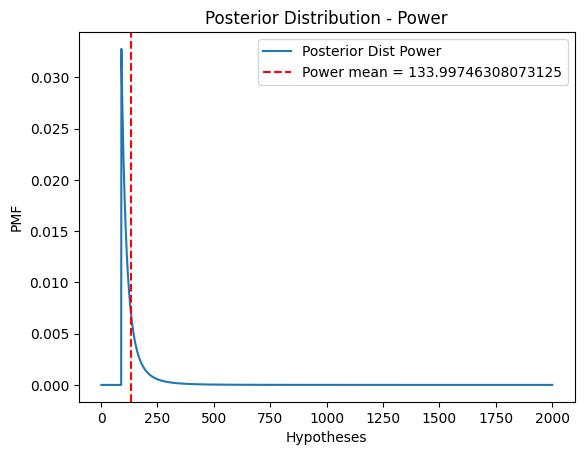

In [52]:
hypos = np.arange(1, 2001)
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()


def update_train(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [60, 30, 90]
posterior = power.copy()
update_train(power, data)

import matplotlib.pyplot as plt

plt.plot(hypos, power, label='Posterior Dist Power') 
plt.axvline(power.mean(), color='r', linestyle='--', 
label=f'Power mean = {power.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution - Power') 
plt.legend() 

plt.show()

- Now the differences are much smaller. 
- In fact, with an arbitrarily large upper
bound, the mean converges on 134.
- The power law prior is more realistic, because it is based on general
information about the size of companies, and it behaves better in practice.

### Credible Intervals
So far we have seen two ways to summarize a posterior distribution: the value
with the highest posterior probability (the MAP) and the posterior mean. These
are both point estimates, that is, single values that estimate the quantity we are
interested in.

Another way to summarize a posterior distribution is with __percentiles__. For
example, if your score is the 90th percentile, that means you did as well as or
better than 90% of the people who took the test.

- If we are given a value, x, we can compute its percentile rank by finding all
values less than or equal to x and adding up their probabilities.
-Pmf provides a method that does this computation. 
- for example, we can
compute the probability that the company has less than or equal to 100 trains:


In [53]:
power.prob_le(100)

np.float64(0.2937469222495771)

With a power law prior and a dataset of three trains, the result is about 29%. So
100 trains is the 29th percentile.

Going the other way, suppose we want to compute a particular percentile; for
example, the median of a distribution is the 50th percentile. We can compute it
by adding up probabilities until the total exceeds 0.5. Here’s a function that does
it:

In [54]:
def quantile(pmf, prob): # Compute a quantile with the given prob.
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= prob:
            return q
    return np.nan

The loop uses items, which iterates the quantities and probabilities in the
distribution. Inside the loop we add up the probabilities of the quantities in order.
When the total equals or exceeds prob, we return the corresponding quantity.

This function is called quantile because it computes a quantile rather than a
percentile. The difference is the way we specify prob. If prob is a percentage
between 0 and 100, we call the corresponding quantity a percentile. If prob is a
probability between 0 and 1, we call the corresponding quantity a quantile.
Here’s how we can use this function to compute the 50th percentile of the
posterior distribution:

In [55]:
quantile(power, 0.5)

113

The result, 113 trains, is the median of the posterior distribution.

Pmf provides a method called quantile that does the same thing. We can call
it like this to compute the 5th and 95th percentiles:

In [56]:
power.quantile([0.05, 0.95])

array([ 91., 243.])

The result is the interval from 91 to 243 trains, which implies:

- The probability is 5% that the number of trains is less than or equal to 91.
- The probability is 5% that the number of trains is greater than 243.
Therefore the probability is 90% that the number of trains falls between 91 and
243 (excluding 91 and including 243). For this reason, this interval is called a
90% credible interval.

Pmf also provides credible_interval, which computes an interval that
contains the given probability.

In [57]:
power.credible_interval(0.90)

array([ 91., 243.])

There is 68% probability that the result is in the following interval: 

In [58]:
power.credible_interval(0.68)

array([ 95., 165.])

In [60]:
power.quantile([0.16, 0.84])

array([ 95., 165.])

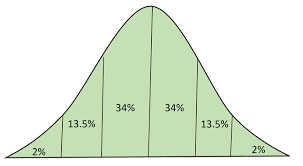 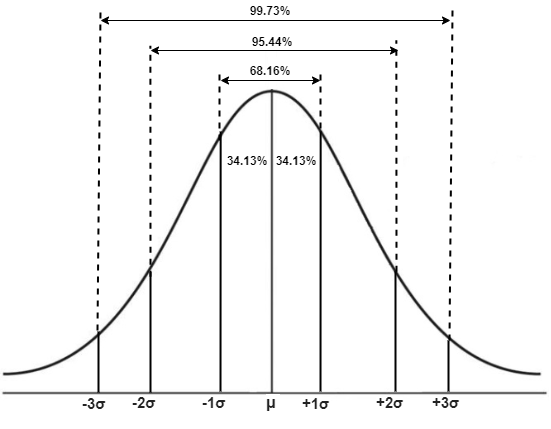

## The German Tank

During World War II, the Economic Warfare Division of the American Embassy
in London used statistical analysis to estimate German production of tanks and
other equipment.

- The Western Allies had captured log books, inventories, and repair records that
included chassis and engine serial numbers for individual tanks.
- Analysis of these records indicated that serial numbers were allocated by
manufacturer and tank type in blocks of 100 numbers, that numbers in each
block were used sequentially, and that not all numbers in each block were used.
- So the problem of estimating German tank production could be reduced, within
each block of 100 numbers, to a form of the Train Problem.
- Based on this insight, American and British analysts produced estimates
substantially lower than estimates from other forms of intelligence. 
- And after the
war, records indicated that they were substantially more accurate.

They performed similar analyses for tires, trucks, rockets, and other equipment,
yielding accurate and actionable economic intelligence.

suppose there exists an unknown number of items which are sequentially numbered from 1 to N. A random sample of these items is taken and their sequence numbers observed; the problem is to estimate N from these observed numbers. 

- The adversary is presumed to have manufactured a series of tanks marked with consecutive whole numbers, beginning with serial number 1. Additionally, regardless of a tank's date of manufacture, history of service, or the serial number it bears, the distribution over serial numbers becoming revealed to analysis is uniform, up to the point in time when the analysis is conducted. 

- Assuming tanks are assigned sequential serial numbers starting with 1, suppose that four tanks are captured and that they have the serial numbers: 19, 40, 42 and 60. 

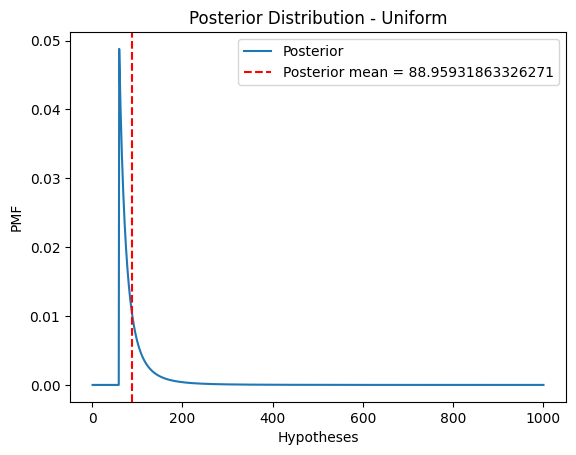

In [61]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)


def update_train(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [19, 40, 42, 60]
posterior = prior.copy()
update_train(posterior, data)

import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution - Uniform') 
plt.legend() 

plt.show()

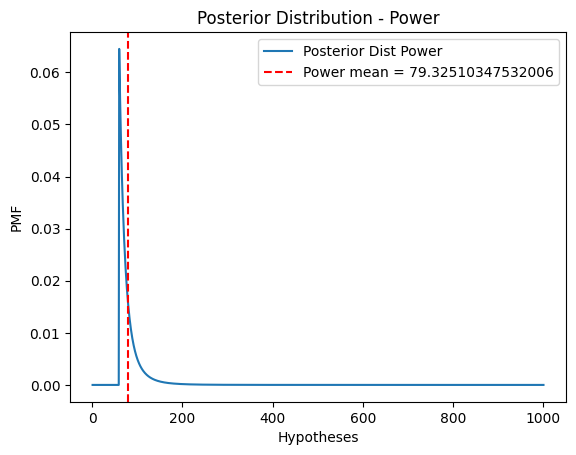

In [62]:
hypos = np.arange(1, 1001)
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()


def update_train(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [19, 40, 42, 60]
posterior = power.copy()
update_train(power, data)

import matplotlib.pyplot as plt

plt.plot(hypos, power, label='Posterior Dist Power') 
plt.axvline(power.mean(), color='r', linestyle='--', 
label=f'Power mean = {power.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution - Power') 
plt.legend() 

plt.show()

There is 68% probability that the result is in the following interval: 

In [63]:
power.credible_interval(0.68)

array([62., 94.])

There is 95% probability that the result is in the following interval: 

In [65]:
power.credible_interval(0.95)

array([ 60., 150.])

## Informative Priors
Among Bayesians, there are two approaches to choosing prior distributions.
- Some recommend choosing the prior that best represents background
information about the problem; in that case the prior is said to be informative.

The problem with using an informative prior is that people might have different
information or interpret it differently. So informative priors might seem arbitrary.

- The alternative is a so-called uninformative prior, which is intended to be as
unrestricted as possible, to let the data speak for itself. In some cases you can
identify a unique prior that has some desirable property, like representing
minimal prior information about the estimated quantity.

Uninformative priors are appealing because they seem more objective. But I am
generally in favor of using informative priors. Why? 
- First, Bayesian analysis is
always based on modeling decisions. Choosing the prior is one of those
decisions, but it is not the only one, and it might not even be the most subjective.
So even if an uninformative prior is more objective, the entire analysis is still
subjective.
- Also, for most practical problems, you are likely to be in one of two situations:
either you have a lot of data or not very much. If you have a lot of data, the
choice of the prior doesn’t matter; informative and uninformative priors yield
almost the same results. If you don’t have much data, using relevant background
information (like the power law distribution) makes a big difference.

In [ ]:
hypos = np.arange(1, 1500)
prior = Pmf(1, hypos)


def update_train(pmf, data): # Update pmf based on new data.
    for datum in data: 
        hypos = pmf.qs
        likelihood = np.where(hypos >= datum, 1 / hypos, 0)
        pmf *= likelihood
        pmf.normalize()
    
data = [2, 1, 0]
posterior = prior.copy()
update_train(posterior, data)

import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Hypotheses') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution - Uniform') 
plt.legend() 

plt.show()

## Lecture hall example

Suppose you are giving a talk in a large lecture hall and the fire marshal
interrupts because they think the audience exceeds 1,200 people, which is the
safe capacity of the room.

You think there are fewer then 1,200 people, and you offer to prove it. It would
take too long to count, so you try an experiment:

- You ask how many people were born on May 11 and two people raise
their hands.
- You ask how many were born on May 23 and 1 person raises their hand.
- Finally, you ask how many were born on August 1, and no one raises
their hand.

How many people are in the audience? 

What is the probability that there are
more than 1,200 people?

- Prior Distribution: We start with an initial belief about the number of people in the audience. Without any prior information, we might assume a uniform distribution up to a certain maximum, say 2,000 people.

- Likelihood: We use the data we collected (number of people born on specific dates) to update our beliefs. The likelihood of seeing a certain number of people born on a particular day depends on the audience size and the probability of someone being born on that day, which is roughly 1\365. Use the binomial distribution to calculate the likelihood of the observed data.

- Posterior Distribution: After updating the prior with the likelihood for each piece of data, we get the posterior distribution, which represents our updated belief about the number of people in the audience.

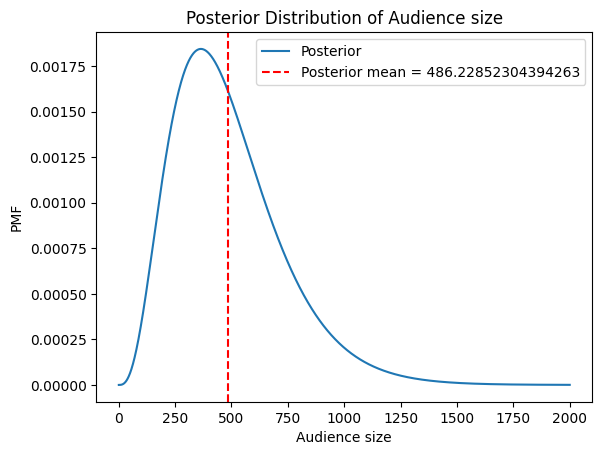

In [71]:
from scipy.stats import binom

hypos = np.arange(1, 2001)
prior = Pmf(1, hypos)


def update_audience(pmf, data): # Update pmf based on new data.
    for count in data: 
        hypos = pmf.qs
        # Binomial likelihood for each hypothesis 
        likelihood = binom.pmf(count, hypos, 1/365)
        pmf *= likelihood
        pmf.normalize()
    
data = [2, 1, 0]
posterior = prior.copy()
update_audience(posterior, data)

import matplotlib.pyplot as plt

plt.plot(hypos, posterior, label='Posterior') 
plt.axvline(posterior.mean(), color='r', linestyle='--', 
label=f'Posterior mean = {posterior.mean()}') 
plt.xlabel('Audience size') 
plt.ylabel('PMF') 
plt.title('Posterior Distribution of Audience size') 
plt.legend() 

plt.show()




In [72]:
# Calculate the probability of having more than 1,200 people 
prob_more_than_1200 = posterior[1200:].sum()
prob_more_than_1200

np.float64(0.011237515568273815)

the probability of having more than 1,200 people is ca 1 %

In [84]:
posterior.credible_interval(0.97)

array([ 113., 1152.])